# Group 9 ISSS609  Project Code

# Sephora Sentiments: Unveiling Insights through Text Analytics

# Loading The Packages

In [6]:
import pandas as pd
import numpy as np
from numpy.random import rand
import re

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import rand
from ast import literal_eval
from matplotlib import colormaps
import squarify

from wordcloud import WordCloud
import networkx as nx
import pickle
import string
from collections import Counter, defaultdict
import operator
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim import corpora


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###### run this to get the requirements

# Loading the Data

- Our projects consists of two main data sets :
    - Product information data set which is named as produt_info.
    - Total Reviews, the data come in multiple data sets which will be concatenated into one single data set names as reviews_df

##### Here we explore the Product  Data set

In [10]:
product_info = pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\product_info.csv")

In [ ]:
product_info.shape

(8494, 27)

In [ ]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [ ]:
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
# Check for any duplicate products in the data set - we filter on the product id

In [4]:
product_info = product_info[~product_info.duplicated(subset = ['product_id'])]

In [ ]:
product_info.shape # the total of no of rows did not change which shows that there are no duplicates in the dataset

(8494, 27)

In [ ]:
(product_info.isna().mean() * 100).sort_values(ascending=False).round(1) # Percent of missing values

sale_price_usd        96.8
value_price_usd       94.7
variation_desc        85.3
child_max_price       67.6
child_min_price       67.6
highlights            26.0
size                  19.2
variation_value       18.8
variation_type        17.0
tertiary_category     11.7
ingredients           11.1
rating                 3.3
reviews                3.3
secondary_category     0.1
sephora_exclusive      0.0
brand_id               0.0
child_count            0.0
primary_category       0.0
new                    0.0
out_of_stock           0.0
online_only            0.0
limited_edition        0.0
brand_name             0.0
product_name           0.0
price_usd              0.0
loves_count            0.0
product_id             0.0
dtype: float64

In [ ]:
product_info.describe().round(2)  # Check data consistency if there are any outliers, trends, etc.

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.00,8494.00,8216.00,8216.00,8494.00,451.00,270.00,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00,2754.00,2754.00
mean,5422.44,29179.57,4.19,448.55,51.66,91.17,20.21,0.07,0.07,0.22,0.07,0.28,1.63,53.79,39.67
std,1709.60,66092.12,0.52,1101.98,53.67,79.20,24.33,0.26,0.26,0.41,0.26,0.45,5.38,58.77,38.69
min,1063.00,0.00,1.00,1.00,3.00,0.00,1.75,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00
25%,5333.00,3758.00,3.98,26.00,25.00,45.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00,19.00
50%,6157.50,9880.00,4.29,122.00,35.00,67.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,32.00,28.00
75%,6328.00,26841.25,4.53,418.00,58.00,108.50,25.00,0.00,0.00,0.00,0.00,1.00,1.00,59.00,42.00
max,8020.00,1401068.00,5.00,21281.00,1900.00,617.00,320.00,1.00,1.00,1.00,1.00,1.00,105.00,570.00,400.00


# Data сleansing

from the first glances of the data it is understood that only the 'ingredients' and 'size' columns need to be cleaned and rest of the data is pretty much clean. 
- for now we want to clean this column because bigger zise items can have higher prices and hence when a customer order a bigger size variation and is not happy with the product there are very high chances for a negative review , Ofcourse this will be tested with a correlation matrix at later stages of the analysis.

### The 'size' column

The 'size' column looks significant for the next analysis, so I need to convert its values ​​from strings to numbers. This column contains many different values, such as:
 - 1.7 oz/ 50 mL
 - Mascara Base - 0.13 oz/ 4 mL
 - 11" H x 16" W x 5" L

Let's calculate which units 'oz', 'ml' or 'g' are most common. Sometimes the function will count incorrectly because it will encounter values ​​such as 'Or**g**anic Crema 25 ml', but this is an acceptable error

In [6]:
units = ['oz', 'ml', 'g']
counter = [sum(isinstance(val, str) and unit in val.lower() 
          for val in product_info['size']) 
          for unit in units]

for unit, number in zip(units, counter):
    print(f'{unit} = {number}')

oz = 6614
ml = 5170
g = 1300


Since most products are in ounce format, let's write a function that extracts the ounces in 'float' format for each product, otherwise it returns NaN

In [7]:
def get_oz_values(val: any) -> any:
    """Extracts the value representing ounces, otherwise returns NaN.
    
    Returns:
        int | float | np.nan
    """

    if isinstance(val, str) and ('oz' in val.lower()):
        try:
            oz_start = val.lower().find('oz')
            clean_val = val[:oz_start].strip().lower().replace('fl.', '').replace('–', '*') \
                .replace('fl', '').replace('x', '*').replace('-', '*')
            if '/' in clean_val:
                clean_val = clean_val[clean_val.find('/') + 1:].strip()
            if '*' in clean_val:
                i = [x.isdigit() for x in clean_val].index(True)
                clean_val = round(eval(clean_val[i:]), 2)
            return float(clean_val)
        except:
            return np.nan

    elif isinstance(val, (int, float)):
        return val

    else:
        return np.nan

Using the new function, I will create a new column 'size_oz' and look at the result written in it

In [8]:
# Create a new column containing only the ounce values
product_info['size_oz'] = (product_info['size'].apply(get_oz_values)).to_frame()

# Show first rows of original and new columns
with pd.option_context('display.max_colwidth', 20, 'display.max_columns', None):
    display(product_info[['size', 'size_oz']].head(10))

# Show how many non-null values in new column and what is the data type
non_null_count = product_info['size_oz'].count()
data_type = product_info['size_oz'].dtype
print(f'\nColumn "size_oz" has:\n'
      f'  - non-null values: {non_null_count} (df size is {len(product_info)})\n'
      f'  - data type: {data_type} \n')

,size,size_oz
0,NaN,NaN
1,3.4 oz/ 100 mL,3.40
2,3.4 oz/ 100 mL,3.40
3,3.4 oz/ 100 mL,3.40
4,3.4 oz/ 100 mL,3.40
5,0.25 oz/ 7.5 mL,0.25
6,0.25 oz/ 7.5 mL,0.25
7,3.4 oz/ 100 mL,3.40
8,3.4 oz/ 100 mL,3.40
9,0.25 oz/ 7.5 mL,0.25



Column "size_oz" has:
  - non-null values: 6595 (df size is 8494)
  - data type: float64 



For clarity, We'll also visualize the 10 most frequent volumes/weights in ounces

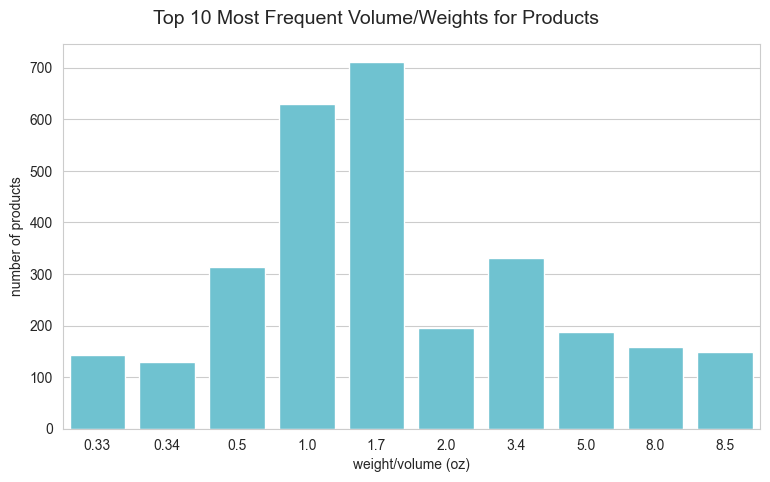

In [8]:
count_ounces = product_info['size_oz'].value_counts().rename_axis('size_oz').reset_index(name='count').round(2).head(10)

sns.set_style('whitegrid')
sns.barplot(x='size_oz', y='count', data=count_ounces, color='#5FCEE0').set(ylabel='number of products', xlabel='weight/volume (oz)')
plt.title('Top 10 Most Frequent Volume/Weights for Products', fontsize=14, y=1.03, x=0.45)
plt.gcf().set_size_inches(9, 5);

# Correlation Analysis

Below we will construct a correlation matrix:
- Pearson's correlation matrix

> What Is Pearson correlation Matrix ?
>
> Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables

Although the Pearson correlation is a widely used, it has some limitations. It only applies to continuous variables and linear relationships, and is sensitive to outliers. However, it is a classic useful way to look at the data through this matrix for a complete analysis.


In [9]:
# Select columns of interest for correlation matrices
columns = ['loves_count', 'rating', 'reviews', 'size_oz',  
       'variation_type', 'price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'primary_category', 'secondary_category',
       'tertiary_category', 'child_count', 'child_min_price', 'child_max_price']

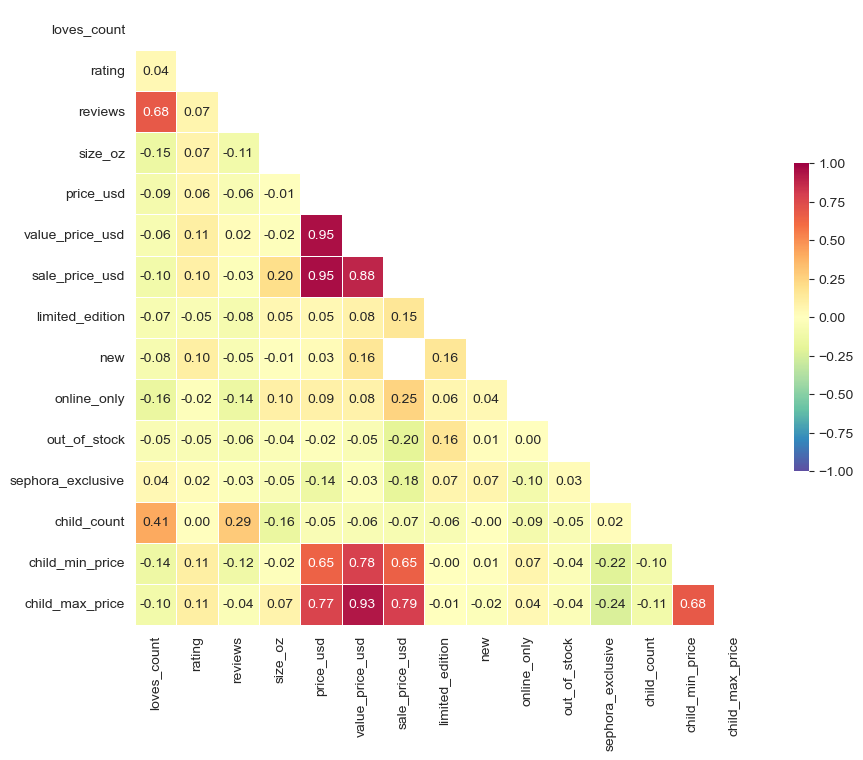

In [ ]:
# Compute the correlation matrix
corr = product_info[columns].corr()

# Set up the figure size
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
            mask=np.triu(np.ones_like(corr, dtype=bool)),  # Mask for the upper triangle
            cmap='Spectral_r',
            linewidths=.5, cbar_kws={'shrink':.5});

Based on this Pearson's correlation matrix, we observe the following:

High correlation
- **reviews** | **loves_count**. The more reviews, the more likes (and vice versa). Obviously these are indicators of the popularity of the product 
- **price_usd** | **sale_price_usd** | **value_price_usd**. It is also obvious that they are related, since the calculation of the value and the discount price is based on the normal price of the product
- **child_min_price** | **child_max_price** | **all prices**. It can be seen that variations of the same product do not have significant price differences from the basic price and the relationship between them is clearly visible
- **child_min_price** | **child_max_price**. If a product has only one variation, its price is written in both columns at once, which is why the connection is so strong

Medium correlation
- **child_count** | **loves_count**. The more variations a product has, the more likes it gets. Given that there is a strong correlation between the number of likes and reviews, we assume that products with more variations will have more reviews

Low correlation
- **online_only** | **sale_price_usd**. Probably products sold online only more often at discounts
- **child_count** | **reviews**. Another confirmation of the assumption made earlier in the 'Medium correlation' section

## Distribution of products by categories

Let's visualize how many total products are in each primary category. 
Since the 'Gifts' category has only 4 products, exclude it from the following chart:

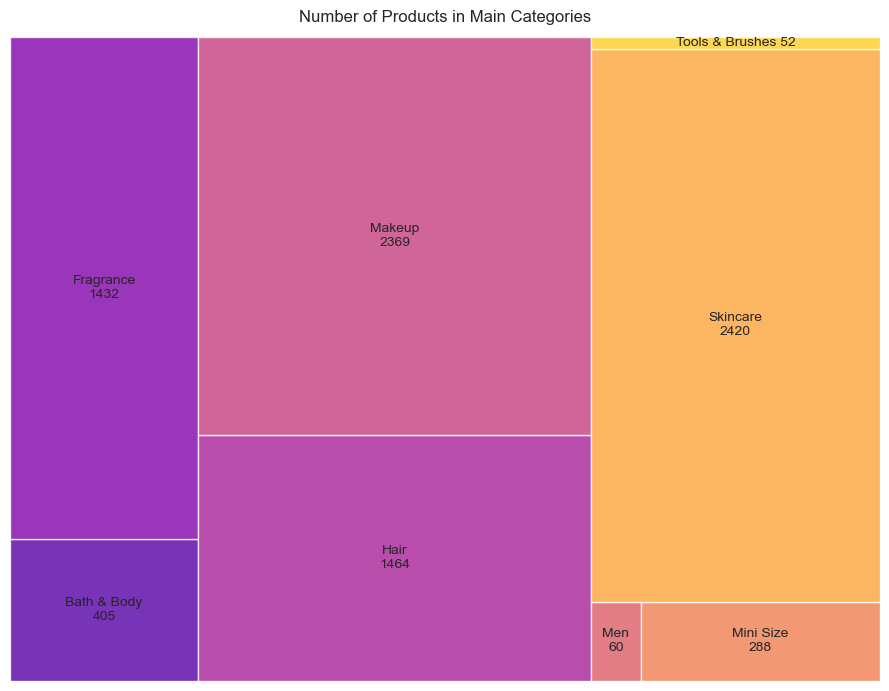

In [ ]:
# Create the dataframe
df2 = product_info[['product_id', 'primary_category']].drop(product_info[product_info.primary_category == 'Gifts'].index)

# Create a pivot table to count the number of products in each category
pivot_table = pd.pivot_table(df2, index=['primary_category'], values='product_id', aggfunc='count')
pivot_table.reset_index(inplace=True)
pivot_table.columns = ['primary_category', 'count']

# Create the labels for the treemap
labels = pivot_table.apply(lambda x: f"{x['primary_category']} {x['count']}" 
                           if x['primary_category'] == 'Tools & Brushes' 
                           else f"{x['primary_category']}\n{x['count']}", 
                           axis=1).to_list()

# Create the values for the treemap
values = pivot_table['count'].tolist()

# Create colors for the treemap, change the 'plasma' colormap to make it lighter
lighter_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'lighter_plasma', mpl.colormaps['plasma'](np.linspace(0.15, 1, 256)))
x = rand(8)  # 8 rectangles used
colors = [lighter_cmap(i) for i in np.arange(0, 1, 1/len(x))]

# Set the size of the plot
fig = plt.figure(figsize=(9, 7))

# Create the treemap
squarify.plot(sizes=values, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10}, norm_x=200)

# Adjust the plot parameters
plt.title('Number of Products in Main Categories', y=1.01)
plt.axis('off')
plt.tight_layout()

As we can see, most products fall into 4 categories, which is consistent with general [statistics](https://explodingtopics.com/blog/beauty-industry-stats#skincare-products-stats) about the beauty industry.We assume Skin care should easily be one of the most revenue generating category.

Next, We'll do a visualization showing the distribution of products into more general primary categories and narrowly focused tertiary categories.
- this can give an very rough idea what could be most frequently taked about topics in the reviwes.

In [ ]:
# How many products have both tertiary and primary categories?
(product_info.groupby('primary_category', dropna=True)['tertiary_category'].agg(['count'])
   .sort_values('count', ascending=False)
   .reset_index())

,primary_category,count
0,Makeup,2216
1,Skincare,2040
2,Fragrance,1416
3,Hair,1345
4,Bath & Body,377
5,Men,59
6,Tools & Brushes,51
7,Gifts,0
8,Mini Size,0


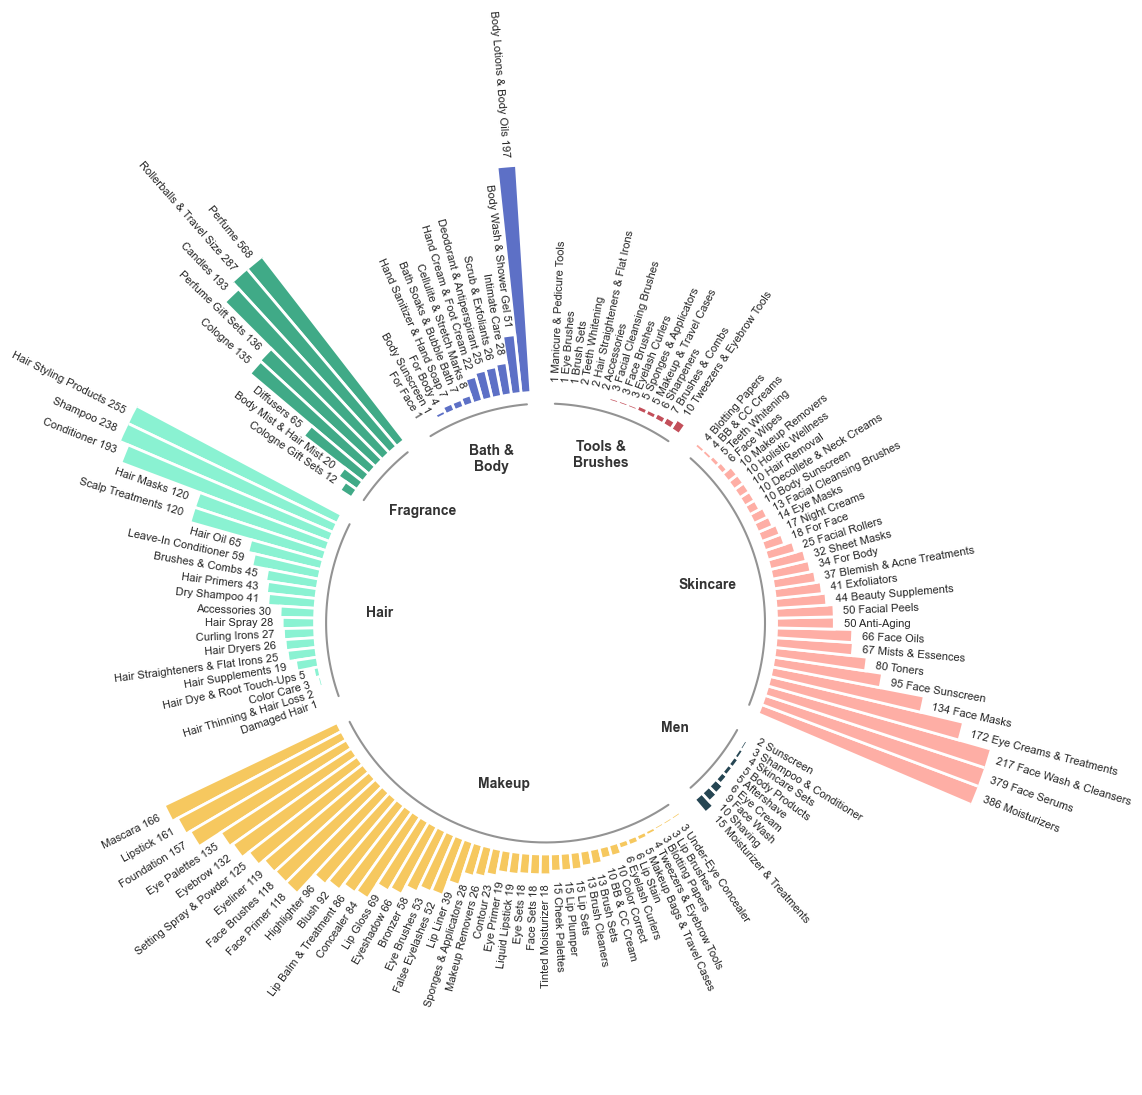

In [10]:
######################
# Arrange data frame and extract all required values

# Create sorted dataframe and exclude Gifts and Mini Size categories
df_sorted = (
    product_info.loc[~product_info['primary_category'].isin(['Gifts', 'Mini Size'])]
    .groupby(['primary_category', 'tertiary_category'], dropna=True)
    .size()
    .reset_index(name='count')
    # .query('count > 2')
    .sort_values(['primary_category', 'count'], ascending=[1, 0])
)

# Create variables based on sorted dataframe
VAL_LABEL = df_sorted['count'].values
VALUES = np.where(df_sorted['count'] > 450, df_sorted['count'] / 4, df_sorted['count'] / 2)
LABELS = df_sorted['tertiary_category'].values
GROUP = df_sorted['primary_category'].values
GROUPS_SIZE = df_sorted.groupby('primary_category')['tertiary_category'].count().tolist()

######################
# Basic shape, color and size settings

# Shape setting
PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2

# Color setting
color_map = {
    'Tools & Brushes': '#C34F5A', # firebrick
    'Skincare': '#feaea5', # salad green
    'Men': '#264653', # dark blue
    'Makeup': '#f6c85f', # yellow
    'Hair': '#8af2d2', # light blue
    'Fragrance': '#40aa87', # green
    'Bath & Body': '#5d70c6'# sapphire blue
    }
COLORS = [color_map[group] for group in GROUP]


# Size setting
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD


fig, ax = plt.subplots(figsize=(22, 12), subplot_kw={'projection': 'polar'})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

######################
# Add bars and text for each subcategory (tertiary category)

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = 'right'
        rotation = rotation + 180
    else: 
        alignment = 'left'
    return rotation, alignment

def add_labels(angles, values, labels, val_label, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them
    for angle, value, label, val_label in zip(angles, values, labels, val_label):
        angle = angle
        if value >= 100:
            value = 100
        
        # Obtain text rotation, alignment and label names
        rotation, alignment = get_label_rotation(angle, offset)

        if alignment == 'right':
            s = f'{label} {val_label}'
        else:
            s = f'{val_label} {label}'
            

        # Add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=s, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode='anchor',
            fontsize=8
        )

# Create bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor='white', linewidth=2
)

# Add labels for each subcategory (tertiary category)
add_labels(ANGLES[IDXS], VALUES, LABELS, VAL_LABEL, OFFSET, ax)

######################
# Add lines and annotations for each group (primary category)

offset = 0
for group, size in zip(list(np.unique(GROUP)), GROUPS_SIZE):
    # Calculate x coordinates for the current group and plot a line below the bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color='#939393')
    
    # Add text to indicate group
    if group == 'Tools & Brushes':
        mod_group = 'Tools &\nBrushes'
        ax.text(
            np.mean(x1), -23, mod_group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    elif group == 'Bath & Body':
        mod_group = 'Bath &\nBody'
        ax.text(
            np.mean(x1), -25, mod_group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    else:
        ax.text(
            np.mean(x1), -28, group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    # Update the offset for the next group
    offset += size + PAD

## Customer favorite

According to a lot of research, the availability of ratings and reviews plays a crucial role in the process of choosing and buying products online, so their distribution can tell us a lot.

### Average likes, ratings and reviews by category

A quick look at the average distribution of the parameters of interest by category. In general, I see confirmation of the correlation established at the beginning between the number of 'loves' and the reviews. 

In [ ]:
(product_info.groupby('primary_category')
   .agg(total_prod=('product_id', 'count'),
       avg_rating=('rating', 'mean'),
       avg_reviews=('reviews', 'mean'),
       avg_loves=('loves_count', 'mean'))
   .sort_values('total_prod', ascending=False)
   .round(2)
   .reset_index())

,primary_category,total_prod,avg_rating,avg_reviews,avg_loves
0,Skincare,2420,4.23,463.87,27111.17
1,Makeup,2369,4.15,682.00,54235.49
2,Hair,1464,4.20,253.90,13710.24
3,Fragrance,1432,4.23,266.23,12757.71
4,Bath & Body,405,4.20,198.99,16453.69
5,Mini Size,288,4.01,719.05,26676.97
6,Men,60,4.50,72.71,4855.87
7,Tools & Brushes,52,4.27,220.08,14988.88
8,Gifts,4,4.56,17.00,0.00


### Products

Bazaarvoice as a service provider, talks about the [importance](https://www.bazaarvoice.com/blog/why-ratings-and-reviews-are-important-for-your-business/) of ratings and reviews for the business. Let's see how many products have no stars or reviews at all:

In [ ]:
# How many products don't have reviews, ratings, or 'love' from customers?
print('Total products in the online store:', product_info.shape[0])
print('\nNo reviews:', len(product_info[product_info['reviews'] == 0]))
print('No "love" (equivalent of likes):', len(product_info[product_info['loves_count'] == 0]))
print('No rating (no stars):', len(product_info[product_info['rating'] == 0]))

Total products in the online store: 8494

No reviews: 0
No "love" (equivalent of likes): 91
No rating (no stars): 0


Every product in this store has at least one review and a non-zero rating! Consistently putting words into action.

Find the 10 products with the most 'loves':

In [ ]:
# Top 10 products with the most loves (=likes) count
(product_info[['product_name','brand_name', 'tertiary_category', 
     'loves_count', 'rating', 'reviews']]
     .sort_values('loves_count', ascending=False).head(10))

,product_name,brand_name,tertiary_category,loves_count,rating,reviews
6242,Soft Pinch Liquid Blush,Rare Beauty by Selena Gomez,Blush,1401068,4.5356,4733.0
5249,Radiant Creamy Concealer,NARS,Concealer,1153594,4.3080,12887.0
4431,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,NaN,1081315,4.3508,16118.0
6434,Cream Lip Stain Liquid Lipstick,SEPHORA COLLECTION,Lipstick,1029051,4.3201,11111.0
2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,Lip Gloss,968317,4.6357,12136.0
2524,Pro Filt’r Soft Matte Longwear Liquid Foundation,Fenty Beauty by Rihanna,Foundation,856497,4.0356,16935.0
5250,Blush,NARS,Blush,840076,4.6643,18127.0
247,Brow Wiz Ultra-Slim Precision Brow Pencil,Anastasia Beverly Hills,Eyebrow,834189,4.4056,15885.0
4458,Translucent Loose Setting Powder,Laura Mercier,Setting Spray & Powder,813497,4.5029,9335.0
7648,Niacinamide 10% + Zinc 1% Oil Control Serum,The Ordinary,Face Serums,763168,4.2439,5778.0


The first product on the list and the last two look interesting, as you can see compared to the rest of the products, they should have a lot more reviews with so many likes.

The number of reviews seems to be the most trustworthy feature for analyzing the popularity of products, let's continue with the reviews. Just now we saw the best products, are there outsiders in the store? 

According to [research](https://spiegel.medill.northwestern.edu/wp-content/uploads/sites/2/2021/04/Spiegel_Online-Review_eBook_Jun2017_FINAL.pdf), a customer should read at least 11 (and [the more the better](https://www.powerreviews.com/blog/how-many-product-reviews/#:~:text=Consumers%20Pay%20Attention%20to%20Review%20Quantity&text=Our%20research%20found%20that%2099,have%20more%20than%20100%20reviews.)) reviews to make sure that this product has been tried by enough people and overcome the fear of buying an unknown product.

For the following table, I used a threshold of 20 reviews:

In [ ]:
# Top 10 worst rated products (with at least 20 reviews)
(product_info[['product_name','brand_name', 'tertiary_category', 'rating', 
     'price_usd', 'reviews', 'loves_count']]
     .query('reviews >= 20')
     .sort_values('rating', ascending=True)
     .head(10))

,product_name,brand_name,tertiary_category,rating,price_usd,reviews,loves_count
340,Laminated Look Brow Kit,Anastasia Beverly Hills,Eyebrow,1.1905,24.0,21.0,3778
6920,Mini Super Slick Tinted Lip Balm,SIMIHAZE BEAUTY,Lipstick,1.6667,24.0,33.0,6499
2723,Holiday Candle Advent Calendar,FORVR Mood,Candles,1.7727,75.0,22.0,5095
4511,Mini Translucent Pure Setting Spray 16HR,Laura Mercier,Setting Spray & Powder,1.7727,21.0,22.0,2607
4567,Click Magnetic Collection Starter Kit—Bestie,Lilly Lashes,False Eyelashes,1.8750,35.0,32.0,3034
3073,Nail Art Stickers,Gucci,NaN,1.9355,20.0,31.0,4551
6774,Color Safe Conditioner,SEPHORA COLLECTION,Conditioner,2.1429,12.0,21.0,1000
6696,Eyebrow Razor Set,SEPHORA COLLECTION,Eyebrow,2.1739,10.0,23.0,4770
6657,LashCraft Have It All Mascara,SEPHORA COLLECTION,Mascara,2.2622,12.0,164.0,8251
5290,High-Pigment Longwear Eyeliner,NARS,Eyeliner,2.2627,24.0,236.0,19169


Rating - is a 5 star rating system.  Let's see below what distribution of products by rating

In [ ]:
# Distribution of products by rating
product_info['rating_scale'] = pd.cut(product_info['rating'], [0, 1, 2, 3, 4, 5])
(product_info.groupby('rating_scale')['product_name']
           .agg(['count'])
           .reset_index()
           .rename(columns={'rating_scale': 'rating scale', 
                            'count': 'number of products'}))

,rating scale,number of products
0,"(0, 1]",12
1,"(1, 2]",36
2,"(2, 3]",231
3,"(3, 4]",2008
4,"(4, 5]",5929


As we can see above more than a half of all products have rating between 4 and 5 stars. Let's examine the statistics for products with such a rating in more detail:

In [ ]:
rat_4plus = product_info[product_info['rating'] >= 4].shape[0]
rat_4plus_percent = round(rat_4plus / product_info.shape[0] * 100, 1)
rat_5 = (product_info['rating'] == 5).sum()
rat_most_pref = product_info['rating'].between(4.2, 4.7).sum()

print(f'''{product_info.shape[0]} - total number of products
\n{rat_4plus_percent}% ({rat_4plus} products) - percentage of products rated 4 or higher
\n{rat_most_pref} - products rated between 4.2 and 4.7
\n{rat_5} - products with a rating equal to 5''')

8494 - total number of products

71.9% (6103 products) - percentage of products rated 4 or higher

3894 - products rated between 4.2 and 4.7

256 - products with a rating equal to 5


 - Almost 72% of all online store assortment have rating 4 or higher.
 - According to [research](https://spiegel.medill.northwestern.edu/wp-content/uploads/sites/2/2021/04/Spiegel_Online-Review_eBook_Jun2017_FINAL.pdf), the most attractive rating for customers is between 4.2 and 4.7. And as I can see, most of the products with a rating of 4 or higher do fall in that range. 
 - At the same time, only 256 products have a rating of exactly 5 stars and are in the "too good to be true" spectrum.

These indicators quite clearly follow the most preferred product evaluation strategies and indicate and speak to the fact that Sephora, as well as Bazaarvoice, are very clear in their policies in this area.

# Now, lets explore the Reviews Dataset

In [11]:
df1=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_0-250.csv")

In [12]:
df2=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_1250-end.csv")

In [13]:
df3=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_250-500.csv")

In [14]:
df4=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_500-750.csv")

In [15]:
df5=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_750-1250.csv")

In [11]:
df1.shape

(602130, 19)

In [ ]:
df2.shape

(49977, 19)

In [ ]:
df3.shape

(206725, 19)

In [ ]:
df4.shape

(116262, 19)

In [ ]:
df5.shape

(119317, 19)

In [ ]:
###Concatenating the mutiple dataset for reviews

In [16]:
reviews_df = pd.concat([df1, df2,df3,df4,df5], axis=0, ignore_index=True)

In [ ]:
reviews_df.shape

(1094411, 19)

In [ ]:
reviews_df.head(3)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [17]:
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)

In [18]:
reviews_df.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [19]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [20]:
reviews_df['submission_time'] = pd.to_datetime(reviews_df['submission_time'])

# Find the oldest and newest date
oldest_date = reviews_df['submission_time'].min()
newest_date = reviews_df['submission_time'].max()

print(f"The oldest date is: {oldest_date}")
print(f"The newest date is: {newest_date}")


The oldest date is: 2008-08-28 00:00:00
The newest date is: 2023-03-21 00:00:00


In [21]:
result_df = pd.merge(reviews_df, product_info[['product_id','primary_category', 'secondary_category', 'tertiary_category']], on='product_id', how='left')

In [22]:
result_df.shape

(1094411, 21)

In [23]:
unique_products = result_df['product_id'].unique()

print(unique_products)
len(unique_products)

['P504322' 'P420652' 'P7880' ... 'P502745' 'P474936' 'P500101']


2351

##### only for the year 2022

In [24]:
latest_review = result_df[(result_df['submission_time'] >= '2022-01-01') & (result_df['submission_time'] <= '2022-12-31')]

In [20]:
latest_review.shape

(192227, 22)

In [25]:
latest_review.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category
450,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I had never used a li...,"Decent, but cheaper products do the trick",...,brown,combination,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN
451,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting on Vaseline because I...,Where’s the smell??,...,brown,normal,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN
452,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing else will do Aquaph...,Must buy!,...,blue,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN


In [26]:
unique_products_one = latest_review['product_id'].unique()

print(unique_products_one)
len(unique_products_one)

['P420652' 'P7880' 'P218700' ... 'P502745' 'P474936' 'P500101']


2076

##### Data Cleaning

Next we need to preprocess the text:

clean it up by getting rid of extraneous characters, punctuation, words with possible misprints, and 'stopwords' which do not add much meaning to a sentence

normalize the text using the lemmatization technique that switches any kind of a word to its base root mode. 

For example, lemmatizing the word 'Caring' would return 'Care'

Below We have written a function that cleans and lemmatizes each review:

In [27]:
def clean_text(text: str) -> str:
    """Cleans input text, tokenizes, removes stop words, and lemmatizes it"""

   
    text = re.sub(r'\d+|[^\w\s]|\b(\w+)(\s+\1)+\b', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()


    stop_words = set(stopwords.words('english'))
    tokens = (WordNetLemmatizer().lemmatize(w) 
              for w in word_tokenize(text) 
              if w not in stop_words and len(w) > 2)
 
    text = ' '.join(tokens)

    return text


latest_review['lemma_text'] = latest_review['review_text'].apply(clean_text)

# Create a column with a set of tokenized review words
latest_review['NLTK_text'] = latest_review['lemma_text'].apply(lambda x: nltk.Text(nltk.word_tokenize(x)))

KeyboardInterrupt: 

In [ ]:
print('Original reviews:')
for review in latest_review['review_text'].head():
    print(review)

print('\nLemmatized reviews:')
for review in latest_review['lemma_text'].head():
    print(review)

Original reviews:
I decided to try this as I had never used a lip mask at night. I find that it smells nice, pretty easy to apply, and does moisturize. However, I find that the products I was using before (drugstore lip rescue, lip scrubs, etc) have nearly the same effect at a fraction of the cost.
Might as well be putting on Vaseline because I can barely smell this! The berry shade has a strong berry smell, but this just smells like Vaseline to me. Maybe I got a bad batch but there’s barely a vanilla smell at all. It is moisturizing but so is Vaseline.
Love this lip mask nothing else will do Aquaphor and Vaseline just aren’t as moisturizing as this mask is I recommend it to everyone I know￼
I really enjoy this product! Amazing smell and the perfect consistency. It is a little weird at first to get used to the feeling on your lips when you wake up (because some of the dead skin becomes more evident) but it does a great job of moisturizing.
The best. I have nothing else to really say ot

#### Rating preprocessing

###### For machine learning, it is better to use simplified approaches to classifying ratings, and divide them into positive/negative or positive/neutral/negative.

##### Let's simplify the 5-point scale ratings and use some heuristics about how the rating represents sentiment:

rating > 3 is positive
rating = 3 is neutral
rating < 3 is negative
Let's create a new 'true_sentiment' column:

In [23]:
# Create a column with the verbal equivalent of a rating
latest_review['true_sentiment'] = latest_review['rating'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

# Show dataframe with new sentiment column
latest_review.head(3)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category,lemma_text,NLTK_text,true_sentiment
450,450,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I had never used a li...,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,decided try never used lip mask night find sme...,"(decided, try, never, used, lip, mask, night, ...",neutral
451,451,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting on Vaseline because I...,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,might well putting vaseline barely smell berry...,"(might, well, putting, vaseline, barely, smell...",negative
452,452,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing else will do Aquaph...,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,love lip mask nothing else aquaphor vaseline a...,"(love, lip, mask, nothing, else, aquaphor, vas...",positive


##### Review text 

In [24]:
latest_review['length'] = latest_review['lemma_text'].apply(len)
latest_review['length'].describe().round(1)

count    192227.0
mean        194.5
std         131.5
min           4.0
25%         117.0
50%         162.0
75%         235.0
max        1497.0
Name: length, dtype: float64

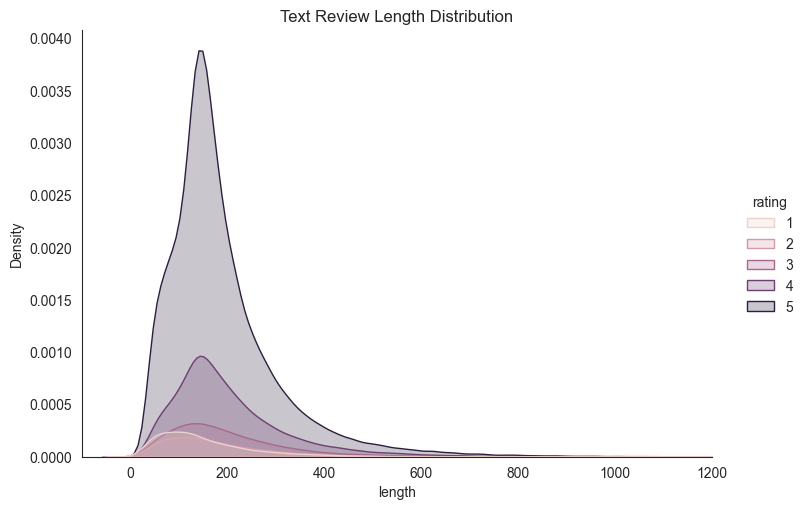

In [28]:
sns.set_style('white')
(sns.displot(data=latest_review, x='length', hue='rating', kind='kde', fill=True, aspect=1.5)
    .set(xlim=(-100, 1200), title='Text Review Length Distribution'));

In [ ]:
# Compare mean review length across ratings
grouped = latest_review.groupby('rating')['length'].agg(mean_length='mean', count='count').reset_index().round(1)
grouped

,rating,mean_length,count
0,1,161.5,9067
1,2,189.4,8231
2,3,207.6,14588
3,4,208.5,37039
4,5,191.4,123302


##### Rating distribution

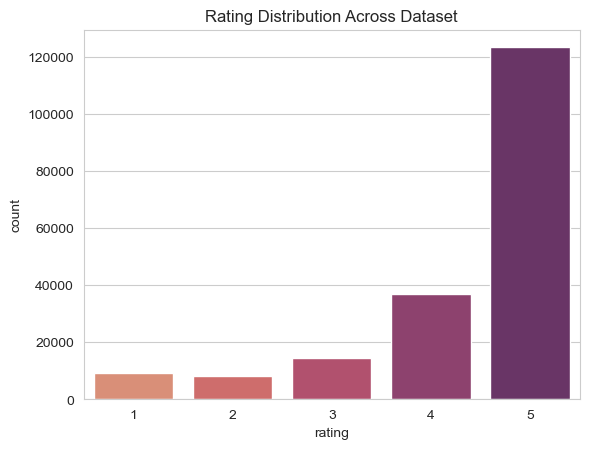

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=latest_review, x='rating', palette='flare').set_title('Rating Distribution Across Dataset')
plt.show()

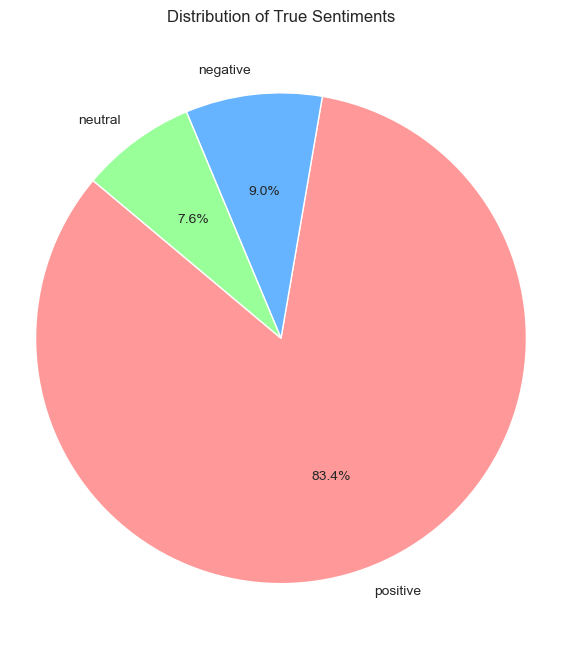

In [ ]:
sentiment_counts = latest_review['true_sentiment'].value_counts()

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Create a pie chart
plt.figure(figsize=(7, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of True Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Most common words (unigrams)

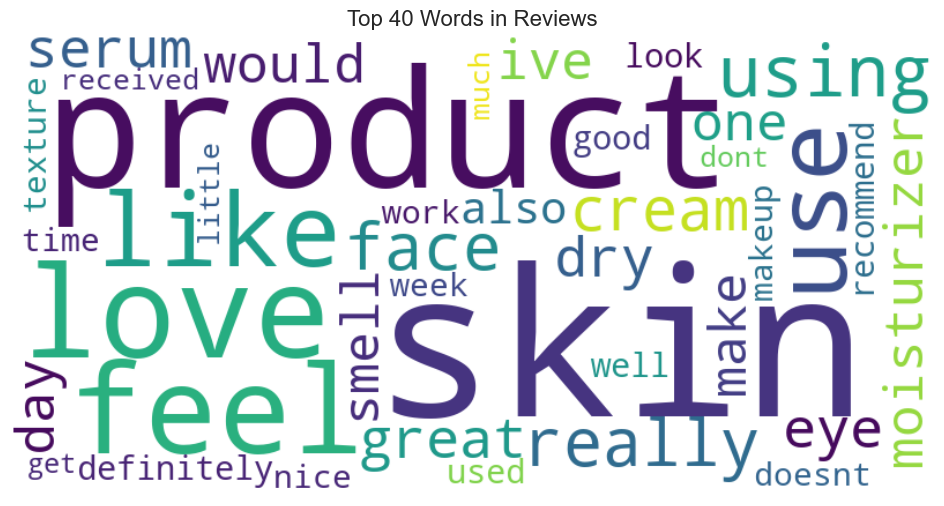

In [ ]:
top_words = Counter(' '.join(latest_review['lemma_text']).split()).most_common(40)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud with a title
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Reviews', fontsize=16)
plt.show()


## Bigrams

##### Before, I was looking at one word at a time (unigrams), but now I'm moving on to looking at pairs of words (bigrams). Bigrams give more context and therefore are more informative than single words.

Let's find combinations of the most frequent pairs of words using previously created column 'NLTK_text' with word sequence:

In [ ]:
# Create list of sorted bigrams
bigrams = Counter()
for phrase in latest_review['NLTK_text']:
    bigrams.update(nltk.bigrams(phrase))
    
bigrams_sorted = sorted(bigrams.items(), key=operator.itemgetter(1), reverse=True)
     

In [ ]:
bigram_list = [bigram[0] for bigram in bigrams_sorted]
latest_review['sorted_bigrams'] = bigram_list

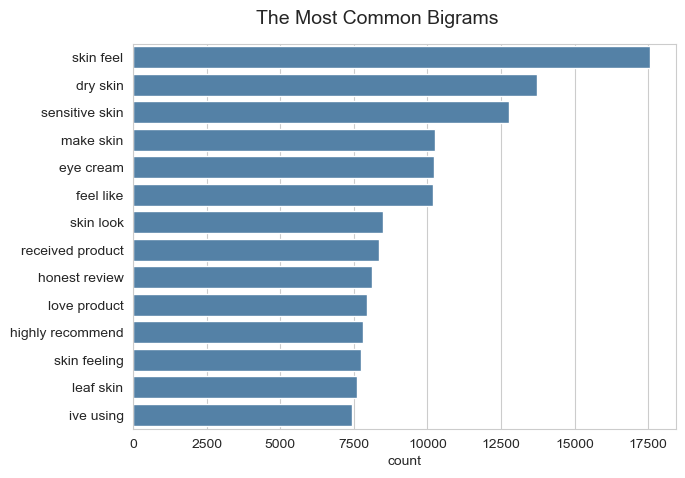

In [ ]:
# Visualize bigrams frequency
bigrams_df = pd.DataFrame(bigrams_sorted[:14], columns=['bigram', 'count'])

plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.barplot(x='count', y=[' '.join(bigram) for bigram in bigrams_df['bigram']], data=bigrams_df, color='steelblue')

plt.xlabel('count')
plt.title('The Most Common Bigrams', fontsize=14, y=1.03, x=0.45);
plt.show()

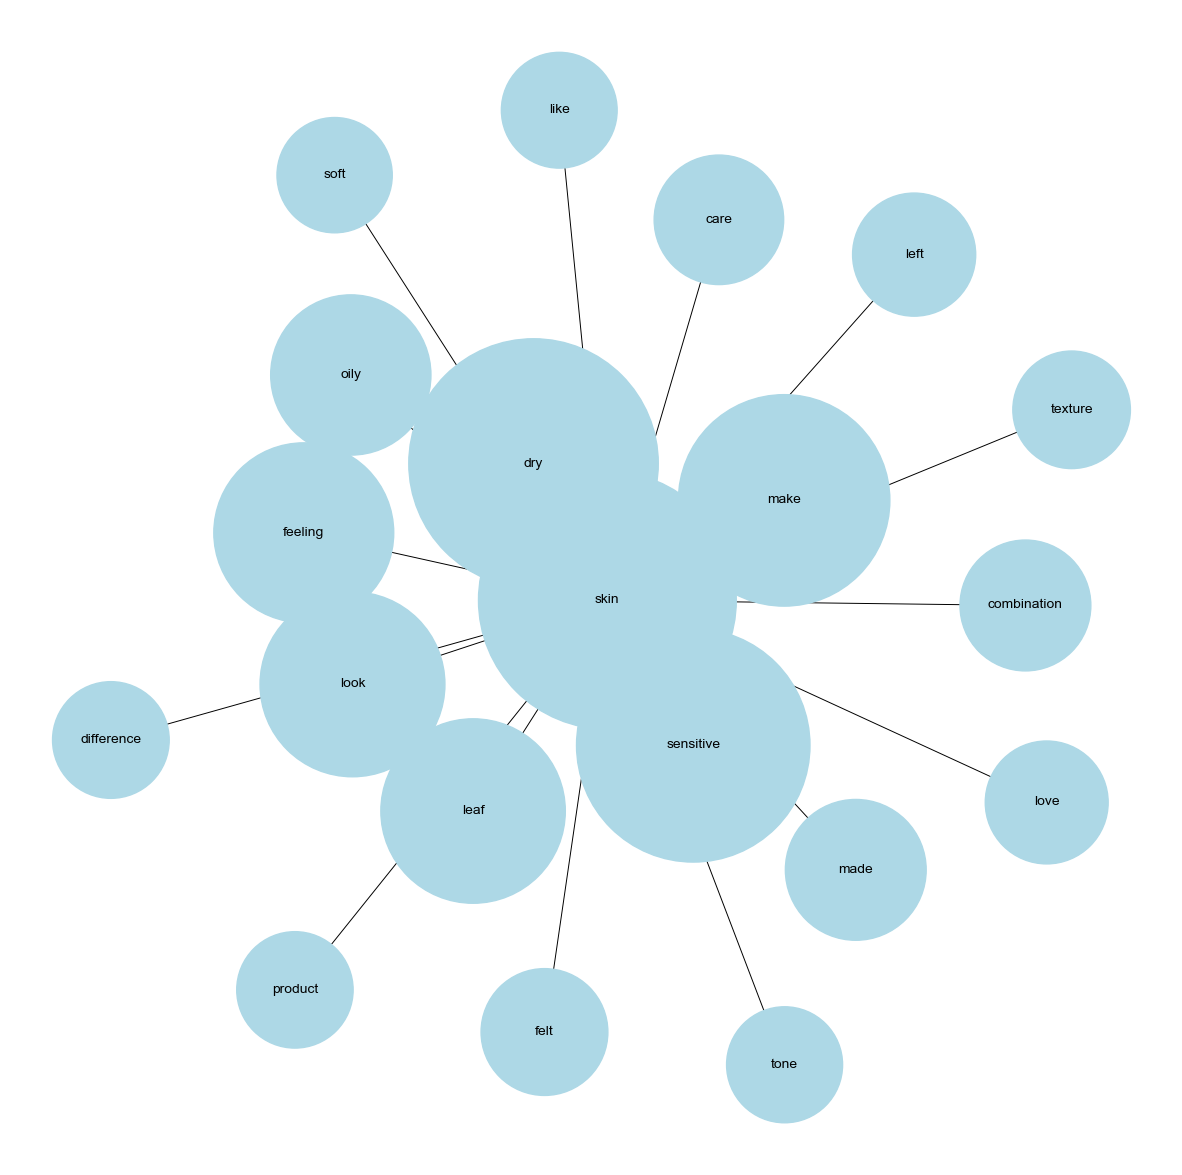

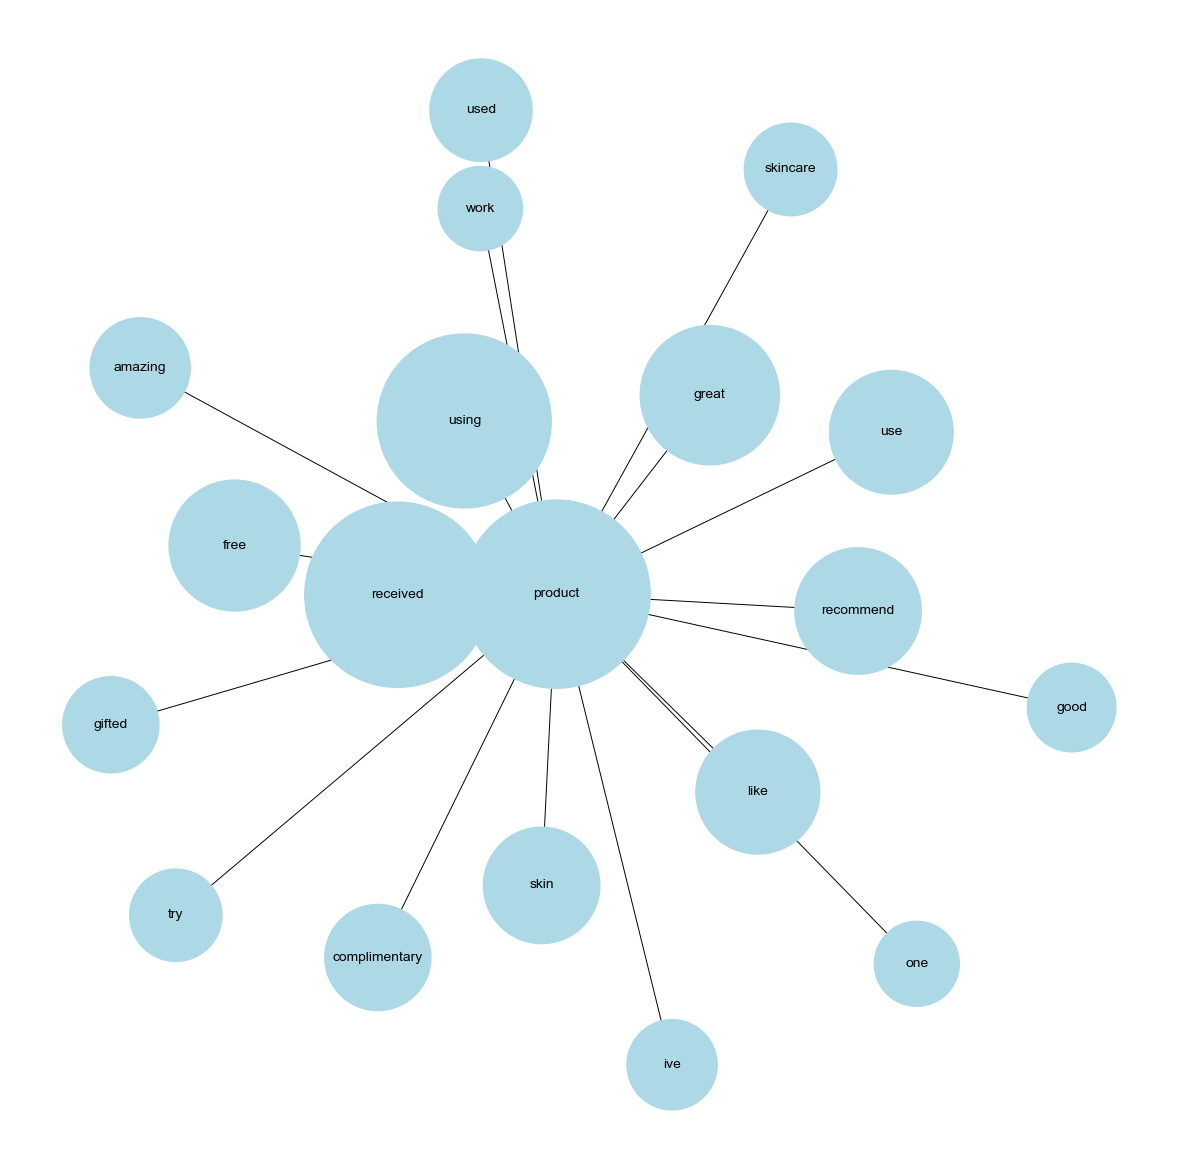

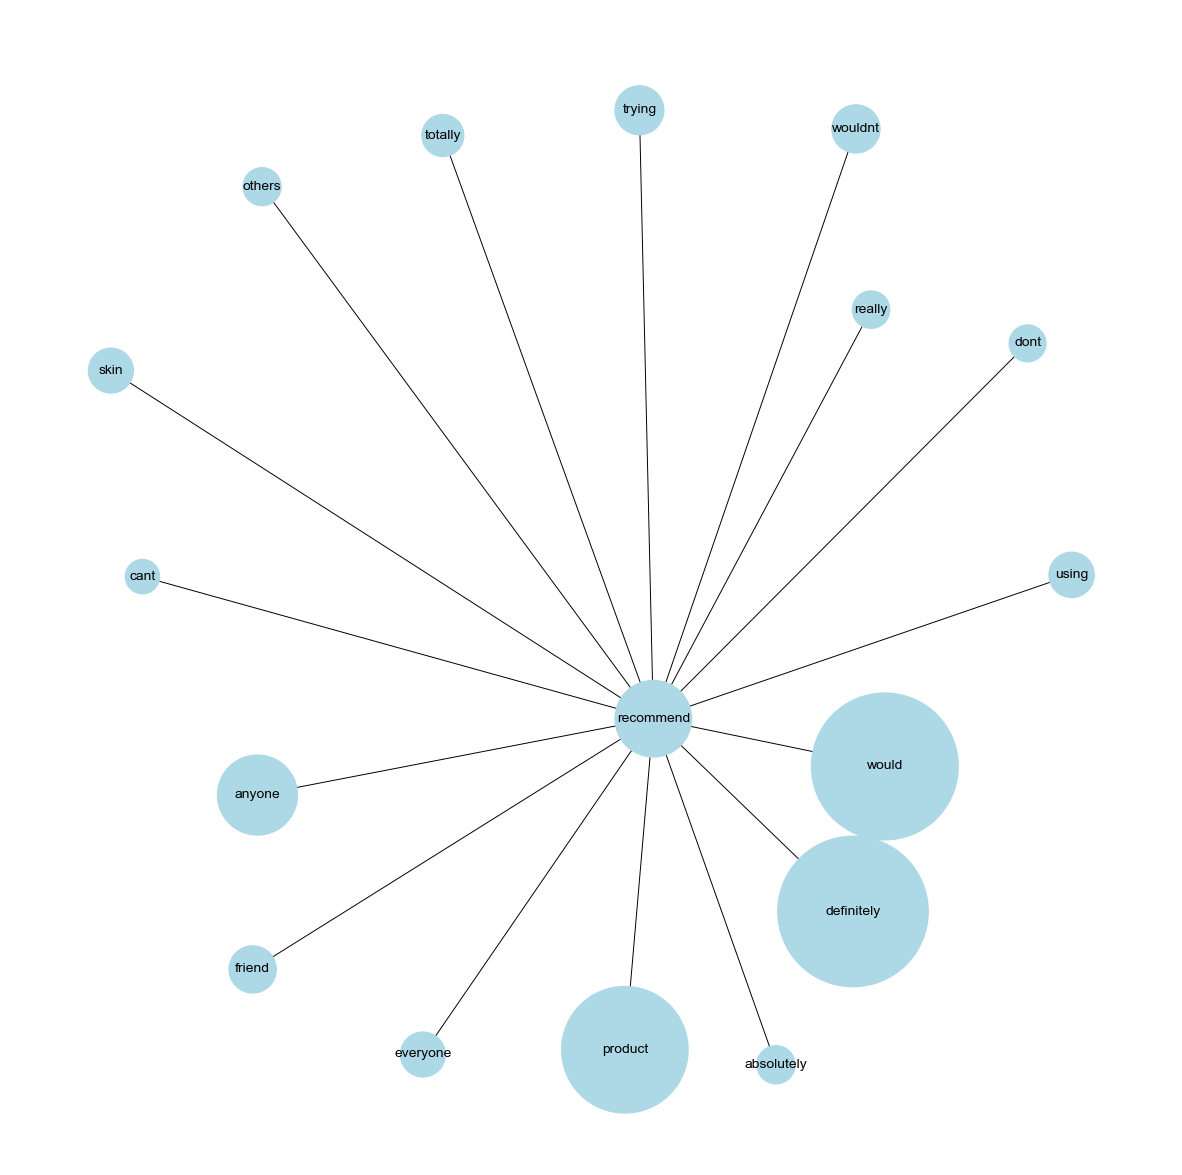

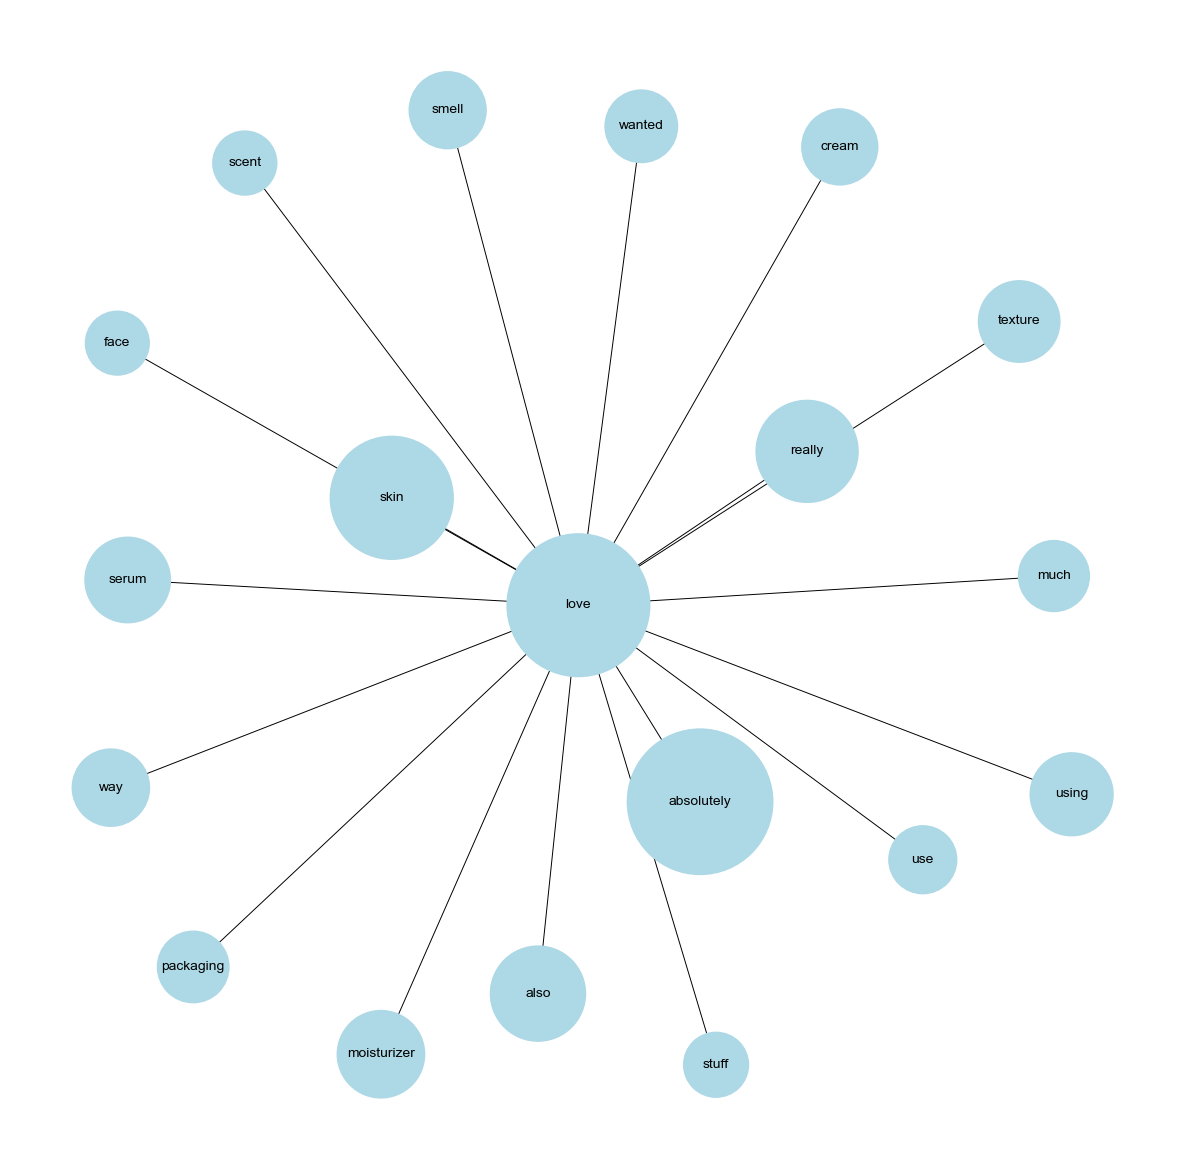

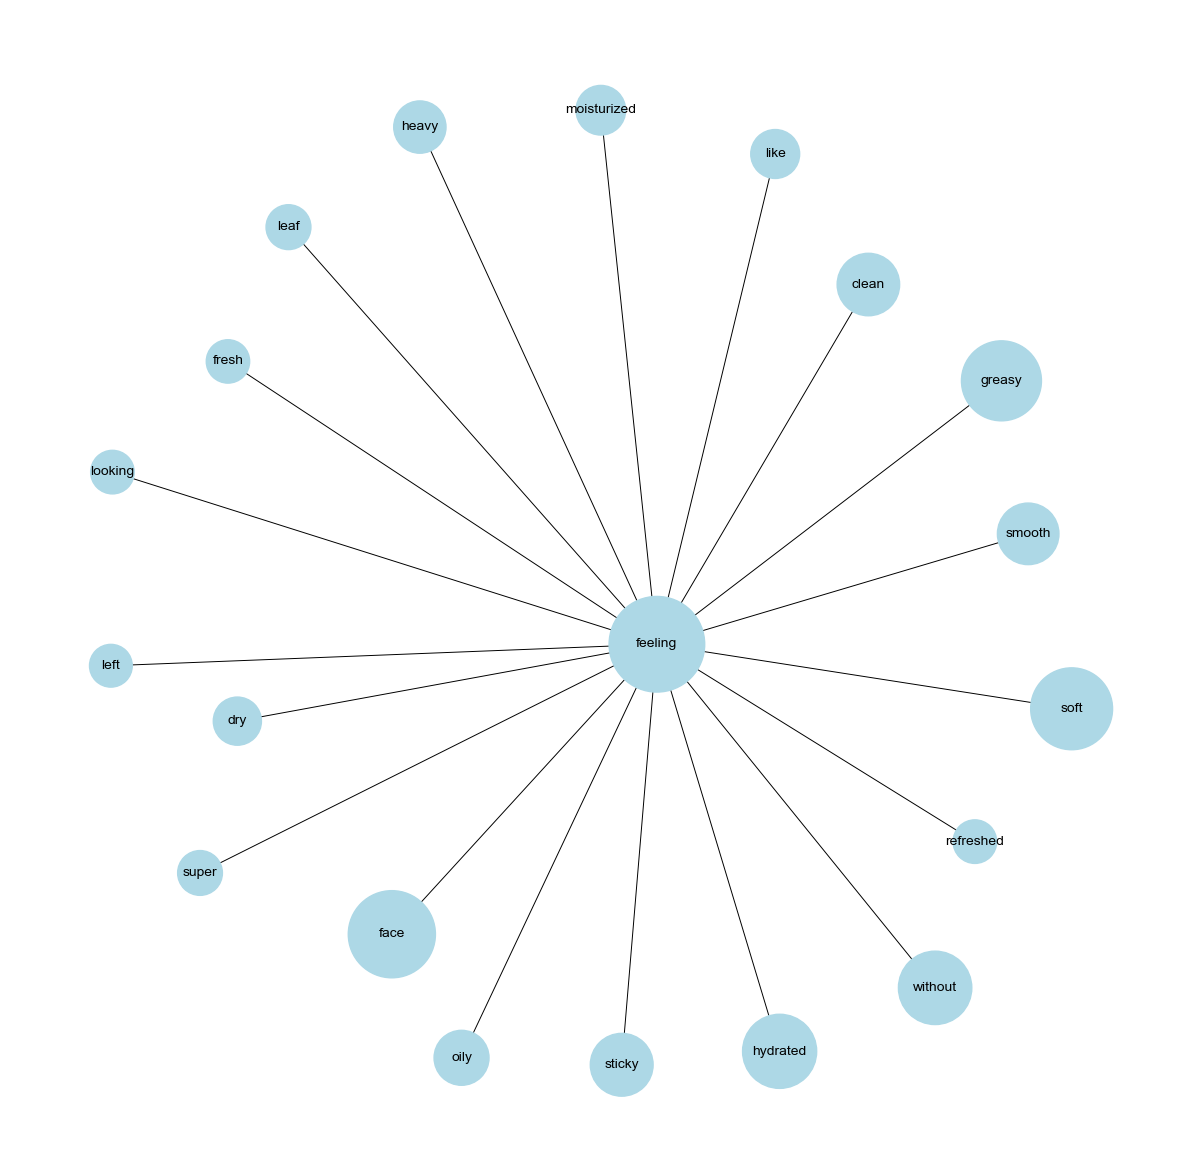

In [ ]:
def draw_network(key_word: str, lst_start: int, lst_end: int, 
                 spring_k=7, nsize_1=8, nsize_2=100):
    """Returns a network graph with the keyword in the center"""

    # Create a list of bigrams for the keyword
    merged_dict = defaultdict(int)
    for bigram, count in bigrams_sorted:
        if key_word in bigram:
            if bigram[0].startswith(key_word):
                key = bigram
            else:
                key = (bigram[1], bigram[0])
            merged_dict[key] += count
    bigram_lst = sorted(merged_dict.items(), key=lambda x: x[1], reverse=True)[lst_start:lst_end]


    # Build a network graph
    G = nx.Graph()
    fig, ax = plt.subplots(figsize=(15, 15))  # Increased the figure size
    plt.axis('off')

    # Set the sizes and positions of the nodes
    node_sizes = {key_word: 800}  # Increased node size for key_word
    for edge, size in bigram_lst:
        node1, node2 = edge
        G.add_edge(node1, node2, weight=size)
        node_sizes[node1] = node_sizes[node2] = size
    pos = nx.spring_layout(G, k=spring_k)
    nsize_lst = [node_sizes[v] * nsize_1 
                 if v != key_word 
                 else node_sizes[v] * nsize_2 
                 for v in node_sizes]
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', ax=ax, node_size=nsize_lst)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, width=0.7);

# Call the function with adjusted parameters
draw_network('skin', 1, 20, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('product', 1, 19, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('recommend', 1, 17, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('love', 1, 19, spring_k=15,  nsize_1=2, nsize_2=10)
draw_network('feeling', 1, 20,spring_k=15,  nsize_1=2, nsize_2=10)
plt.show()

## Trigrams
##### Now, let's look at combinations of three words (trigrams). Yes, we can continue to increase the size of the word group further, but as a rule it is optimal to stop at a group of the size of three words.

#### Let's build a visualization of the most common trigrams:

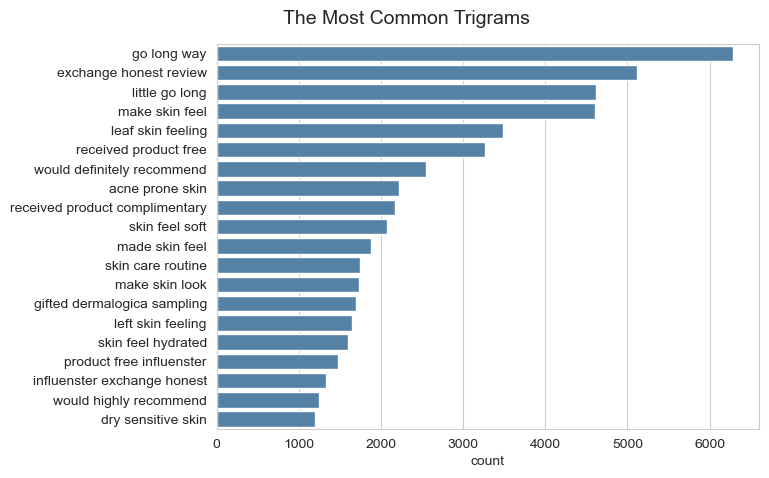

In [ ]:

# Create sorted list of all trigrams
trigrams = Counter()
for phrase in latest_review['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)

# Create dataframe fromt the most common trigrams
trigrams_df = pd.DataFrame(trigrams_sorted[:20], columns=['trigram', 'count'])

# Draw a barplot 
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
sns.barplot(x='count', color='steelblue',
            y=[' '.join(trigram) for trigram in trigrams_df['trigram']], 
            data=trigrams_df)
plt.xlabel('count')
plt.title('The Most Common Trigrams', fontsize=14, y=1.03, x=0.35)
plt.show()

Here we see the most frequent mentions of time duration, mentions of skin feeling, 
an acne problem already encountered, and another interesting observation. 
Here we can see mentions of getting the product in exchange for an honest review and getting the product complimentary, etc. 
In my opinion, it is good that the text explicitly mentions such things, it allows customers to maintain trust in the products and brands.

Finally, let's look at an example of using the n-gram in a sample of interest - negative reviews. The most frequent trigrams in negative reviews:

In [ ]:
trigrams = Counter()
neg_df = latest_review[latest_review['true_sentiment'] == 'negative']
for phrase in neg_df['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)
trigrams_sorted[:20]

[(('really', 'wanted', 'love'), 301),
 (('wanted', 'love', 'product'), 231),
 (('acne', 'prone', 'skin'), 220),
 (('really', 'wanted', 'like'), 216),
 (('exchange', 'honest', 'review'), 157),
 (('dont', 'waste', 'money'), 140),
 (('wanted', 'like', 'product'), 130),
 (('received', 'product', 'free'), 125),
 (('made', 'skin', 'feel'), 117),
 (('left', 'skin', 'feeling'), 110),
 (('make', 'skin', 'feel'), 109),
 (('didnt', 'notice', 'difference'), 103),
 (('excited', 'try', 'product'), 96),
 (('dry', 'sensitive', 'skin'), 92),
 (('didnt', 'see', 'difference'), 79),
 (('would', 'recommend', 'product'), 75),
 (('every', 'time', 'use'), 72),
 (('sits', 'top', 'skin'), 70),
 (('dont', 'sensitive', 'skin'), 67),
 (('high', 'hope', 'product'), 67)]

# 3) Identifying trends

## Data pre-processing

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np
import os

import nltk
from nltk.corpus import PlaintextCorpusReader

#### With stemming/lemmatization

In [26]:
corpus_folder = 'sephora_corpus'

# Create a directory to store the corpus
if not os.path.exists(corpus_folder):
    os.makedirs(corpus_folder)

for index, r in latest_review.iterrows():
    id=r['author_id']
    product_id=r['product_id']
    review_title=str(r['review_title'])
    product_name=r['product_name']
    brand_name=r['brand_name']
    category=r['primary_category']
    secondary_category=r['secondary_category']
    review_text=str(r['lemma_text'])

    filename = f'{id}.txt'  # Organize by category and title
    file_path = os.path.join(corpus_folder, filename)

    # Create the file and write the content
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    with open(file_path, 'w') as file:
        file.write(review_text + " " + review_title)

In [3]:
import preprocess2
reviews_corpus = preprocess2.load_corpus('sephora_corpus')
reviews_docs = preprocess2.corpus2docs(reviews_corpus)
reviews_docs_joined = [" ".join(x) for x in reviews_docs]  #joined to fit vectorizer

In [3]:
print(reviews_docs[0][:30])

['recieved', 'product', 'free', 'exchange', 'honest', 'review', 'skin', 'cream', 'really', 'great', 'moisturizing', 'creamy', 'doesnt', 'leave', 'skin', 'feeling', 'sticky', 'wish', 'pump', 'stay', 'cleaner', 'thats', 'preference', 'great', 'skin', 'cream', 'high', 'quality']


## LDA with Gensim

### Unigram LDA

In [7]:
# Create a Dictionary
id2word = corpora.Dictionary(reviews_docs)

# Create a Corpus
texts = reviews_docs

# Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in texts]

# View the first 30 items of the first document in the corpus
print(corpus[0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1)]


In [36]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [37]:
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [67]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.30))]

corpus_title = ['30% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

 52%|█████▏    | 140/270 [2:51:03<2:50:20, 78.62s/it]

In [46]:
pd.DataFrame(model_results).to_csv('./unigram_lda_tuning_results.csv', index=False)

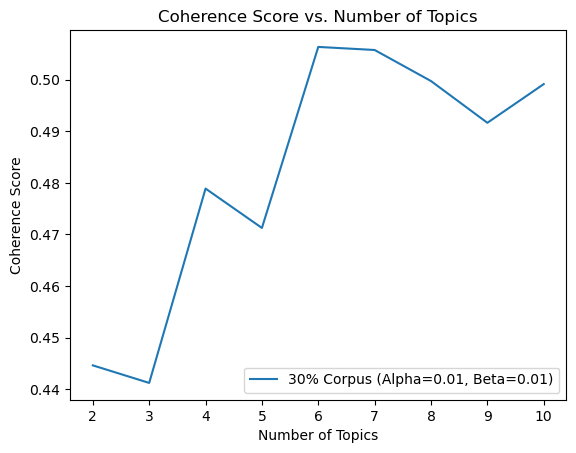

In [72]:
import matplotlib.pyplot as plt

# Extract the data for plotting
topics = model_results['Topics']
coherence_scores = model_results['Coherence']
alpha_values = model_results['Alpha']
beta_values = model_results['Beta']

# Filter the data for alpha = 0.01 and beta = 0.01
filtered_indices = [(alpha == 0.01) and (beta == 0.01) for alpha, beta in zip(alpha_values, beta_values)]

filtered_topics = [topics[i] for i, is_filtered in enumerate(filtered_indices) if is_filtered]
filtered_coherence_scores = [coherence_scores[i] for i, is_filtered in enumerate(filtered_indices) if is_filtered]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot coherence scores for the filtered data
ax.plot(filtered_topics, filtered_coherence_scores, label='30% Corpus (Alpha=0.01, Beta=0.01)')

# Set labels and title
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Coherence Score')
ax.set_title('Coherence Score vs. Number of Topics')

# Display a legend
ax.legend()

# Show the plot
plt.show()


### Bigram LDA

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(reviews_docs, min_count=5, threshold=100) # higher threshold fewer phrases. 

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [30]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [32]:
data_words_bigrams = make_bigrams(reviews_docs)

In [33]:
print(data_words_bigrams[:1][0][:30])

['recieved', 'product', 'free', 'exchange_honest', 'review', 'skin', 'cream', 'really', 'great', 'moisturizing', 'creamy', 'doesnt', 'leave', 'skin', 'feeling', 'sticky', 'wish', 'pump', 'stay', 'cleaner', 'thats', 'preference', 'great', 'skin', 'cream', 'high', 'quality']


In [34]:
# Create a Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create a Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in texts]

# View the first 30 items of the first document in the corpus
print(corpus[0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1)]


In [39]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.30))]

corpus_title = ['30% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

100%|██████████| 270/270 [5:33:16<00:00, 74.06s/it]  


In [40]:
pd.DataFrame(model_results).to_csv('./bigram_lda_tuning_results.csv', index=False)

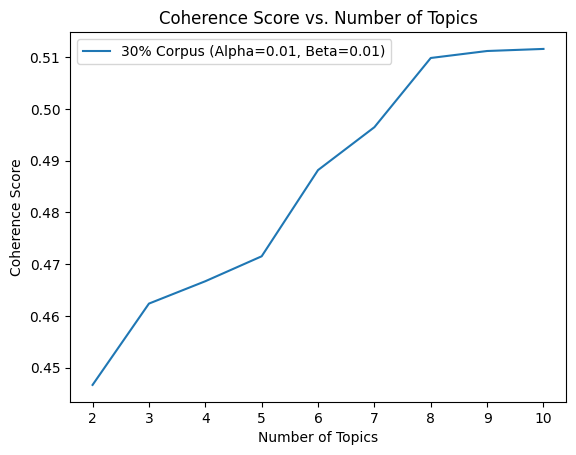

In [41]:
import matplotlib.pyplot as plt

# Extract the data for plotting
topics = model_results['Topics']
coherence_scores = model_results['Coherence']
alpha_values = model_results['Alpha']
beta_values = model_results['Beta']

# Filter the data for alpha = 0.01 and beta = 0.01
filtered_indices = [(alpha == 0.01) and (beta == 0.01) for alpha, beta in zip(alpha_values, beta_values)]

filtered_topics = [topics[i] for i, is_filtered in enumerate(filtered_indices) if is_filtered]
filtered_coherence_scores = [coherence_scores[i] for i, is_filtered in enumerate(filtered_indices) if is_filtered]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot coherence scores for the filtered data
ax.plot(filtered_topics, filtered_coherence_scores, label='30% Corpus (Alpha=0.01, Beta=0.01)')

# Set labels and title
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Coherence Score')
ax.set_title('Coherence Score vs. Number of Topics')

# Display a legend
ax.legend()

# Show the plot
plt.show()


In [51]:
optimal_bigram6_lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=100,
                                       alpha = 0.31,
                                       eta = 0.9099999999999999,
                                       per_word_topics=True, 
                                       chunksize=100,
                                       passes=10,)


In [52]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()  # Enable notebook mode

# Prepare the data for visualization
optimal_bigram6_lda_display = gensimvis.prepare(optimal_bigram6_lda, corpus, id2word, sort_topics=False)

In [53]:
optimal_bigram6_lda_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.078452 -0.122930       1        1  19.480812
1     -0.197831  0.039338       2        1   8.243847
2      0.109175  0.155936       3        1   8.661444
3      0.008324  0.036956       4        1  24.426325
4      0.165324 -0.115838       5        1   8.959399
5     -0.006540  0.006537       6        1  30.228173, topic_info=         Term          Freq         Total Category  logprob  loglift
137       eye  17567.000000  17567.000000  Default  30.0000  30.0000
18       skin  97477.000000  97477.000000  Default  29.0000  29.0000
1       cream  19252.000000  19252.000000  Default  28.0000  28.0000
210     serum  14497.000000  14497.000000  Default  27.0000  27.0000
153  received  10343.000000  10343.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
121       use   8391.729368  25923.427376   Topic6  -4.5693   0.0685
54        day   6001.356270  14289.130225   Topic6  -4.9046   0.3289
125      well   5468.871721  11908.011359   Topic6  -4.9975   0.4183
122     using   6317.931909  23040.040402   Topic6  -4.8532  -0.0974
109     smell   5593.075953  15109.169310   Topic6  -4.9751   0.2026

[447 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
929       1  0.049389  absorbed
929       2  0.000760  absorbed
929       3  0.004559  absorbed
929       4  0.000760  absorbed
929       5  0.531126  absorbed
...     ...       ...       ...
131       2  0.002455   younger
131       3  0.854395   younger
131       4  0.117848   younger
131       5  0.007365   younger
131       6  0.014731   younger

[2112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [56]:
import pickle
pickle.dump(optimal_bigram6_lda, open('optimal_bigram6_lda.pkl', 'wb'))

In [59]:
optimal_bigram8_lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       alpha = 'symmetric',
                                       eta = 0.31,
                                       per_word_topics=True, 
                                       chunksize=100,
                                       passes=10,)


In [60]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()  # Enable notebook mode

# Prepare the data for visualization
optimal_bigram8_lda_display = gensimvis.prepare(optimal_bigram8_lda, corpus, id2word, sort_topics=False)

In [61]:
optimal_bigram8_lda_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.056640 -0.091549       1        1  16.571251
1     -0.063006 -0.190839       2        1   6.210171
2      0.055061  0.154494       3        1   8.851867
3      0.082734  0.017476       4        1  21.602371
4      0.135161  0.062841       5        1  12.610601
5      0.012008 -0.073432       6        1  10.296648
6     -0.351969  0.078247       7        1   2.620118
7      0.073370  0.042762       8        1  21.236974, topic_info=         Term           Freq          Total Category  logprob  loglift
137       eye   18624.000000   18624.000000  Default  30.0000  30.0000
18       skin  101412.000000  101412.000000  Default  29.0000  29.0000
1       cream   20622.000000   20622.000000  Default  28.0000  28.0000
410       lip    7285.000000    7285.000000  Default  27.0000  27.0000
153  received   11113.000000   11113.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
122     using    5110.560841   24010.585879   Topic8  -4.7122   0.0022
121       use    5187.276557   27106.628813   Topic8  -4.6973  -0.1041
3      doesnt    3885.451944   11486.844656   Topic8  -4.9863   0.4655
81       look    3856.732354   11694.542343   Topic8  -4.9937   0.4401
190      good    3869.698245   15373.956512   Topic8  -4.9904   0.1699

[624 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
784       1  0.093089       absolutely
784       2  0.008659       absolutely
784       3  0.061010       absolutely
784       4  0.136190       absolutely
784       5  0.000984       absolutely
...     ...       ...              ...
2238      1  0.009246            yummy
2238      2  0.064720            yummy
2238      7  0.915324            yummy
7964      8  0.951005  zenovia_peptide
3955      4  0.984209              zit

[1736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [62]:
pickle.dump(optimal_bigram8_lda, open('optimal_bigram8_lda.pkl', 'wb'))

## BERTopic

In [4]:
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

In [5]:
topic_model = BERTopic(verbose=True, n_gram_range=(1,1))
topics, _ = topic_model.fit_transform(reviews_docs_joined); len(topic_model.get_topic_info())

Batches:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-10-29 16:50:54,426 - BERTopic - Transformed documents to Embeddings
2023-10-29 16:51:54,765 - BERTopic - Reduced dimensionality
2023-10-29 16:52:02,632 - BERTopic - Clustered reduced embeddings


356

In [17]:
import numpy as np
from bertopic import BERTopic
from gensim import corpora
from sentence_transformers import SentenceTransformer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from hdbscan import HDBSCAN
from umap import UMAP
import gensim.corpora as corpora
import pandas as pd
import tqdm

# Define the range of parameters
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Dimensionality Reduction Parameters
n_neighbors_range = [5, 10, 15]
n_components_range = [3, 5, 7]

model_results = {'Topics': [],
                 'N_Neighbors': [],
                 'N_Components': [],
                 'Coherence': []
                }

# Define the size of the subset (30%)
subset_size = int(len(reviews_docs_joined) * 0.3)
subset_docs = np.random.choice(reviews_docs_joined, subset_size, replace=False)

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(topics_range) * len(n_neighbors_range) * len(n_components_range)))

for k in topics_range:
    for n_neighbors in n_neighbors_range:
        for n_components in n_components_range:
            # Initialize the BERTopic model with specified hyperparameters
            embedding_model = SentenceTransformer('all-mpnet-base-v2')
            umap_model = UMAP(n_neighbors=n_neighbors, n_components=n_components, metric='manhattan', low_memory=True)
            hdbscan_model = HDBSCAN()
            vectorizer_model = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
            ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
            representation_model = KeyBERTInspired()
            
            # Create the BERTopic model
            topic_model = BERTopic(embedding_model=embedding_model, umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model, representation_model=representation_model)
            
            # Fit the model on your subset of documents
            topics, _ = topic_model.fit_transform(subset_docs)
            
            # Preprocess documents
            documents = pd.DataFrame(
                {"Document": subset_docs,
                 "ID": range(len(subset_docs)),
                 "Topic": topics}
            )
            documents_per_topic = documents.groupby(
                ['Topic'], as_index=False).agg({'Document': ' '.join})
            cleaned_docs = topic_model._preprocess_text(
                documents_per_topic.Document.values)
            
            # Extract vectorizer and analyzer from the fitted model
            vectorizer_model = topic_model.vectorizer_model
            analyzer = vectorizer_model.build_analyzer()
            
            # Extract features for topic coherence evaluation
            tokens = [analyzer(doc) for doc in cleaned_docs]
            dictionary = corpora.Dictionary(tokens)
            corpus = [dictionary.doc2bow(token) for token in tokens]
            topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics)) - 1)]
            
            # Calculate coherence
            coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Save the model results
            model_results['Topics'].append(k)
            model_results['N_Neighbors'].append(n_neighbors)
            model_results['N_Components'].append(n_components)
            model_results['Coherence'].append(coherence_score)

            pbar.update(1)
    pbar.close()



 11%|█         | 9/81 [6:16:40<50:13:23, 2511.15s/it]


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(model_results).to_csv('./bertopic_tuning_results.csv', index=False)